In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/total_count.csv')
df

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,급가속,급출발,급감속,급정지
0,20221201,부산70자1854,0,66443,22120105071500,0,193,0,129.158670,35.236021,0,-6.3,0.7,0,0,0,0
1,20221201,부산70자1854,0,66443,22120105071600,0,388,0,129.158670,35.236021,0,-7.9,1.6,0,0,0,0
2,20221201,부산70자1854,0,66443,22120105071700,0,777,0,129.158670,35.236021,0,-8.9,2.2,0,0,0,0
3,20221201,부산70자1854,0,66443,22120105071800,0,638,0,129.158670,35.236021,0,-6.6,0.8,0,0,0,0
4,20221201,부산70자1854,0,66443,22120105071900,0,461,0,129.158670,35.236021,0,-7.1,0.8,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948207,20221231,부산70자1894,176,3095705,22123121033800,0,331,0,129.158597,35.235956,66,-5.7,-1.2,0,0,0,0
5948208,20221231,부산70자1894,176,3095705,22123121033900,0,59,0,129.158597,35.235956,66,-5.8,-1.4,0,0,0,0
5948209,20221231,부산70자1894,176,3095705,22123121034000,0,0,0,129.158597,35.235956,66,-5.4,-1.0,0,0,0,0
5948210,20221231,부산70자1894,176,3095705,22123121034100,0,0,0,129.158597,35.235956,66,-5.4,-0.9,0,0,0,0


In [3]:
bus_1893 = df.query('번호판 == "부산70자1893"')
bus_1893

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,급가속,급출발,급감속,급정지
2873328,20221201,부산70자1893,0,2022752,22120104254100,0,185,0,0.000000,0.000000,0,9.4,0.1,0,0,0,0
2873329,20221201,부산70자1893,0,2022752,22120104254200,0,246,0,0.000000,0.000000,0,-6.2,0.1,0,0,0,0
2873330,20221201,부산70자1893,0,2022752,22120104254300,0,827,0,0.000000,0.000000,0,-6.2,0.1,0,0,0,0
2873331,20221201,부산70자1893,0,2022752,22120104254400,0,592,0,0.000000,0.000000,0,10.4,0.1,0,0,0,0
2873332,20221201,부산70자1893,0,2022752,22120104254500,0,556,0,0.000000,0.000000,0,10.4,0.1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359148,20221231,부산70자1893,221,2022973,22123123434100,0,0,1,129.158911,35.236089,352,11.0,0.1,0,0,0,0
4359149,20221231,부산70자1893,221,2022973,22123123434200,0,0,0,129.158911,35.236089,352,11.0,0.1,0,0,0,0
4359150,20221231,부산70자1893,221,2022973,22123123434300,0,0,0,129.158911,35.236089,352,-11.6,0.1,0,0,0,0
4359151,20221231,부산70자1893,221,2022973,22123123434400,0,0,0,129.158911,35.236089,352,-11.6,0.1,0,0,0,0


In [4]:
print(bus_1893['급가속'].sum())
print(bus_1893['급출발'].sum())
print(bus_1893['급감속'].sum())
print(bus_1893['급정지'].sum())

23394
9942
5678
7206


In [7]:
y_1893 = bus_1893['급가속']
bus_1893 = bus_1893[['차량속도', 'RPM', '가속도_X', '가속도_Y']]
bus_1893

,차량속도,RPM,가속도_X,가속도_Y
2873328,0,185,9.4,0.1
2873329,0,246,-6.2,0.1
2873330,0,827,-6.2,0.1
2873331,0,592,10.4,0.1
2873332,0,556,10.4,0.1
...,...,...,...,...
4359148,0,0,11.0,0.1
4359149,0,0,11.0,0.1
4359150,0,0,-11.6,0.1
4359151,0,0,-11.6,0.1


In [8]:
from sklearn.decomposition import PCA

n_components = 4
whiten = False
random_state = 42

pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [9]:
X_train_PCA = pca.fit_transform(bus_1893)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=bus_1893.index)

In [10]:
X_train_PCA

,0,1,2,3
2873328,-659.665431,-0.815222,12.987764,1.346633
2873329,-598.686634,-3.077370,-2.499651,0.362282
2873330,-17.789384,-13.996352,-2.111014,0.460798
2873331,-252.736741,-8.392626,14.255409,1.479407
2873332,-288.730375,-7.716063,14.231329,1.473303
...,...,...,...,...
4359148,-844.631645,2.775998,14.456654,1.417284
4359149,-844.631645,2.775998,14.456654,1.417284
4359150,-844.646734,1.159593,-8.039356,-0.023747
4359151,-844.646734,1.159593,-8.039356,-0.023747


In [11]:
# 라이브러리 불러오기
'''메인 라이브러리'''
import numpy as np
import pandas as pd
import os, time, pickle, gzip

'''시각화 관련 라이브러리'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

'''데이터 준비 관련 라이브러리'''
from sklearn import preprocessing as pp

%matplotlib inline

In [12]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

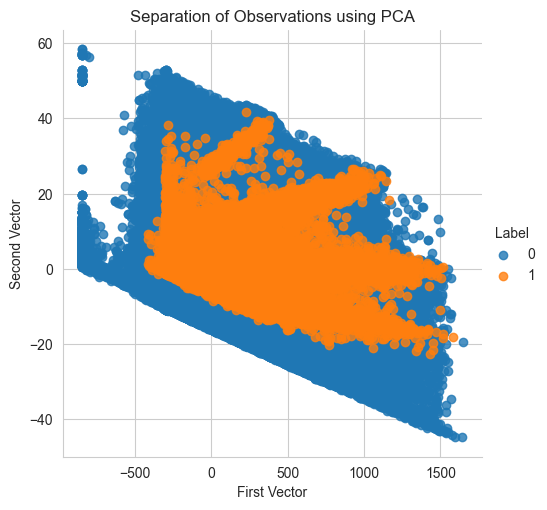

In [13]:
scatterPlot(X_train_PCA, y_1893, 'PCA')

In [14]:
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [15]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [16]:
def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = \
        average_precision_score(preds['trueLabel'],preds['anomalyScore'])

    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: \
    Area under the curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()

    if returnPreds==True:
        return preds

In [17]:
X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=bus_1893.index)

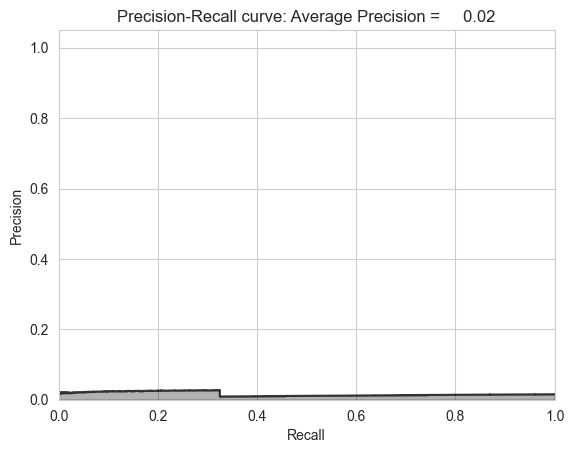

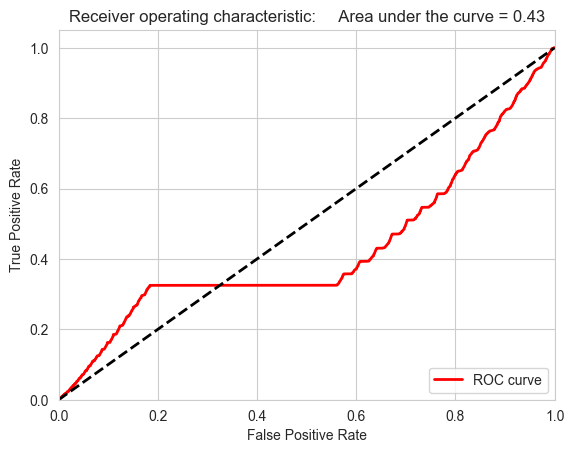

In [20]:

anomalyScoresPCA = anomalyScores(bus_1893, X_train_PCA_inverse)
preds = plotResults(y_1893, anomalyScoresPCA, True)

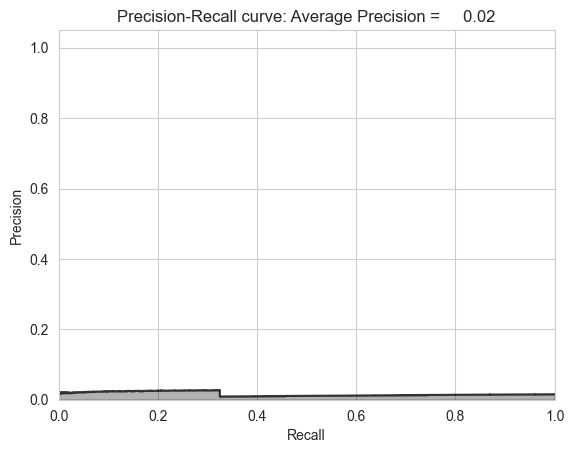

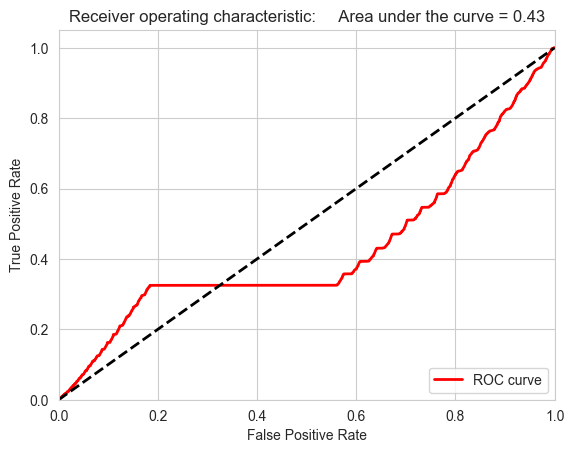

Precision:  0.01
Recall:  0.0
Fraud Caught out of 330 Cases: 5


In [22]:
preds = plotResults(y_1893, anomalyScoresPCA, True)
preds.sort_values(by="anomalyScore", ascending=False, inplace=True)
cutoff = 350
predsTop = preds[:cutoff]
print("Precision: ", np.round(predsTop. \
                              anomalyScore[predsTop.trueLabel == 1].count() / cutoff, 2))
print("Recall: ", np.round(predsTop. \
                           anomalyScore[predsTop.trueLabel == 1].count() / y_1893.sum(), 2))
print("Fraud Caught out of 330 Cases:", predsTop.trueLabel.sum())

In [ ]:
from sklearn.manifold import TSNE

n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'
random_state = 42

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, perplexity=perplexity, early_exaggeration=early_exaggeration, init=init, random_state=random_state)
X_train_tSNE = tSNE.fit_transform(X_train_PCA)
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=X_train_PCA.index)

In [ ]:
scatterPlot(X_train_tSNE, y_1893, 't-SNE')